In [1]:
import numpy as np
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [26]:
imgs_tr = glob("./trainval/*.png")
imgs_test = glob("./test/*.png")

##### {"very basic" : 1, "basic" : 2, "moderate" : 3, "complex" : 4, "very complex" : 5}
##### {range(5,20) : 1, range(20,40) : 2, range(40,60) : 3, range(60,80) : 4, range(80,100) : 5}

#### Load the data

Train & Validation ::

In [3]:
train_data = np.loadtxt('train_data64.csv', delimiter=',')

In [4]:
train = pd.DataFrame(columns=["ImageName", "Features", "Label"])
train['Features'] = train['Features'].astype(object)

In [5]:
trainval_labels = pd.read_csv("label-trainval.csv")

In [6]:
labels = []

for path in imgs:
    
    img_name = path.split("\\")[1]
    mean_val = trainval_labels[trainval_labels["ImageName"] == img_name]["Mark"].values[0]
    if 5 < mean_val < 20:
        labels.append(1)
    elif 20 < mean_val < 40:
        labels.append(2)
    elif 40 < mean_val < 60:
        labels.append(3)
    elif 60 < mean_val < 80:
        labels.append(4)
    else:
        labels.append(5)

In [7]:
train["ImageName"] = [p.split("\\")[1] for p in imgs]
train["Label"] = labels

In [8]:
for i in range(len(imgs)):
    train.at[i, 'Features'] = train_data[i]

In [9]:
train

,ImageName,Features,Label
0,00f8540c-262e-4908-80cd-5e93c176256c.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
1,01a7fb0c-1207-496d-b470-dcf71c2547ef.png,"[0.2526859373938473, 0.1916607764974631, 0.095...",4
2,01b912fd-ec3c-458e-a267-7e06c6f9b00a.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
3,03066ac7-f74a-4168-b563-23e72e1ff41e.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
4,0398f075-f27a-4c19-8e48-a05ff76d84b0.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
...,...,...,...
395,fd5b2732-1b16-40d2-ac98-1704281f1f88.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
396,fdb5d815-7032-46e4-aa80-9e8b61516ac9.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
397,fdb8205b-831a-4f2f-83e8-b428b4723913.png,"[0.19478009070039348, 0.05084320998420696, 0.0...",3
398,fdecb717-ae31-40c3-ae3f-34df4d6f44aa.png,"[0.04269335481125656, 0.0, 0.0, 0.0, 0.0, 0.0,...",3


In [27]:
test_data = np.loadtxt('test_data64.csv', delimiter=',')

In [28]:
test = pd.DataFrame(columns=["ImageName", "Features", "Label"])
test['Features'] = test['Features'].astype(object)

In [29]:
test_labels = pd.read_csv("label-test.csv")

In [30]:
label_test = []

for path in imgs_test:
    
    img_name = path.split("\\")[1]
    mean_val = test_labels[test_labels["ImageName"] == img_name]["Mark"].values[0]
    
    if 5 < mean_val < 20:
        label_test.append(1)
    elif 20 < mean_val < 40:
        label_test.append(2)
    elif 40 < mean_val < 60:
        label_test.append(3)
    elif 60 < mean_val < 80:
        label_test.append(4)
    else:
        label_test.append(5)
        

test["ImageName"] = [p.split("\\")[1] for p in imgs_test]
test["Label"] = label_test

for i in range(len(imgs_test)):
    test.at[i, 'Features'] = test_data[i]

In [31]:
test

,ImageName,Features,Label
0,01f37629-030a-4b06-841e-686b94bedbb9.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
1,02d7021d-12f2-4149-99cf-c543151c0780.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
2,03dc264e-f9df-40fc-bac0-c8ac54202ffd.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
3,05525f8d-cfdc-4299-a9b6-afb4c96d22db.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
4,071b0738-c89d-482f-9fe0-317404e402af.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0999999999687...",2
...,...,...,...
95,d7cca36d-8ef1-4b2a-8db9-565b28fa24b3.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
96,e50f3704-782c-4daf-94c9-17d171afd0e2.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
97,e7a9308b-5f4c-4abe-ad33-f6e3ac2401be.png,"[0.0, 0.0, 0.0, 0.0, 0.046033561935882296, 0.0...",2
98,f25e44f5-d111-453c-b407-ae7039efac05.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3


## Machine Learning

#### Data is splitted as %70 train, %30 test

In [32]:
X_train, X_val, y_train, y_val = train_test_split(train["Features"].values, 
                                                    train["Label"].values, 
                                                    test_size=0.30, 
                                                    random_state=42, 
                                                    shuffle=True)

In [33]:
X_train = np.array([np.array([np.array(i) for i in x]) for x in X_train])
y_train = np.array(y_train)

X_val = np.array([np.array([np.array(i) for i in xt]) for xt in X_val])
y_val = np.array(y_val)

In [34]:
X_test = np.array([np.array([np.array(i) for i in x]) for x in test["Features"].values])
y_test = np.array(test["Label"].values)

In [13]:
import seaborn as sn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
predictions = rf.predict(X_val)
print("Random Forest algorithm result: ", rf.score(X_val, y_val))

Random Forest algorithm result:  0.5583333333333333


In [37]:
print(classification_report(y_val, predictions))
print("Accuracy:", accuracy_score(y_val, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.59      0.92      0.72        71
           3       0.29      0.07      0.11        30
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.56       120
   macro avg       0.18      0.20      0.17       120
weighted avg       0.42      0.56      0.45       120

Accuracy: 0.5583333333333333


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


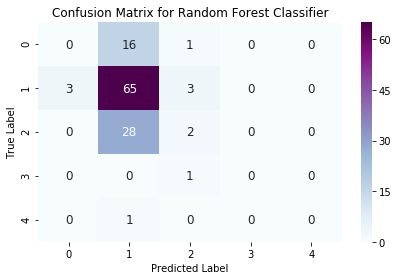

In [38]:
matrix = confusion_matrix(y_val, predictions)
sn.heatmap(matrix, annot=True, cmap="BuPu", annot_kws={"size": 12})

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest Classifier')

plt.ylim([5,0]) 
plt.tight_layout()
plt.show()

In [39]:
test_predictions = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

Test Accuracy: 0.54


#### XGBoost

In [40]:
import xgboost as xg

xgb = xg.XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [41]:
preds = xgb.predict(X_val)
print("XGBoost algorithm result: ", xgb.score(X_val, y_val))

print(classification_report(y_val, preds))
print("Accuracy:", accuracy_score(y_val, preds))

XGBoost algorithm result:  0.55
              precision    recall  f1-score   support

           1       0.20      0.06      0.09        17
           2       0.59      0.87      0.70        71
           3       0.30      0.10      0.15        30
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.55       120
   macro avg       0.22      0.21      0.19       120
weighted avg       0.45      0.55      0.47       120

Accuracy: 0.55


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


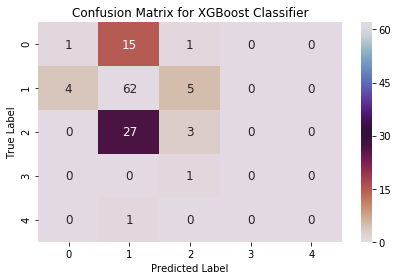

In [42]:
matrix = confusion_matrix(y_val, preds)
sn.heatmap(matrix, annot=True, cmap="twilight_r", annot_kws={"size": 12})

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for XGBoost Classifier')

plt.ylim([5,0]) 
plt.tight_layout()
plt.show()

In [43]:
test_preds = xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_preds))

Test Accuracy: 0.52


#### Support Vector Machines (SVM)

In [44]:
from sklearn import svm

model = svm.SVC(kernel='rbf')   # Gaussian Kernel

model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred = model.predict(X_val)
print("SVM algorithm result: ", model.score(X_val, y_val))

print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

SVM algorithm result:  0.5916666666666667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.59      1.00      0.74        71
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.59       120
   macro avg       0.12      0.20      0.15       120
weighted avg       0.35      0.59      0.44       120

Accuracy: 0.5916666666666667


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


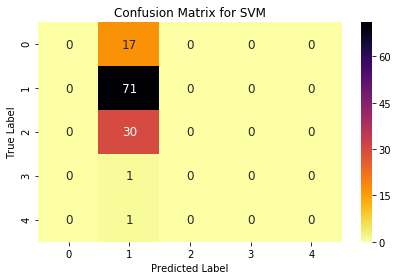

In [46]:
matrix = confusion_matrix(y_val, y_pred)
sn.heatmap(matrix, annot=True, cmap="inferno_r", annot_kws={"size": 12})

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for SVM')

plt.ylim([5,0]) 
plt.tight_layout()
plt.show()

In [47]:
test_y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_y_pred))

Test Accuracy: 0.54
